# BIG DATA ANALYSIS : Image Classification Using Machine Learning
---

## 이미지도 사실 행렬

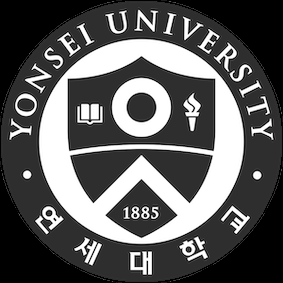

In [1]:
import numpy as np
from PIL import Image

img = Image.open('data/yonsei-logo.png').convert('L')#흑백으로 변환
display(img)

In [2]:
arr = np.array(img)
print(arr.shape)

(283, 283)


In [3]:
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Mnist 데이터 셋을 이용한 손글씨 인식

In [4]:
from sklearn.datasets import fetch_openml

#데이터 다운로드
mnist = fetch_openml('mnist_784', cache=False)
#Features
X = mnist.data
#Label
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


## 한 이미지를 골라서 매트릭스로 출력을 해보면

In [5]:
for i in range(0,784,28):
    print(" ".join([str(int(x)).ljust(3) for x in X[0][i:i+28].tolist()]))


0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0  
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0  
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0  
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   0   0   

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


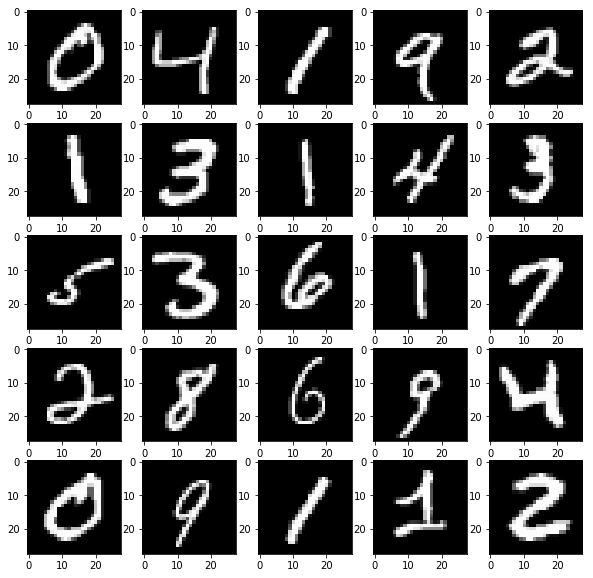

In [7]:
fig = plt.figure(figsize=(10,10))
for row in range(0,5):
    for col in range(1,6):
        index = row*5+col
        plt.subplot(5,5,index)
        img = X[index].reshape(28, 28)
        #행렬을 이미지로
        plt.imshow(img, cmap='gray')
plt.show()




# Classification 모델 만들기

In [8]:
from sklearn.metrics import accuracy_score, log_loss

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


In [11]:
import pandas as pd

In [12]:
# 사용할 Classifier 리스트에 저장
classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    GaussianNB()
]
#일단 10000개의 데이터만 갖고 훈련
num_of_samples = 10000

X_train, X_test, y_train, y_test = \
            X[:num_of_samples], X[-5000:] ,y[:num_of_samples], y[-5000:] 


In [13]:
# 각 모델의 훈련 및 예측 시간을 기록하기 위한 패키지
import time

In [14]:

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    print("="*30)
    name = clf.__class__.__name__
    print(name)
    start_time = time.time()
    clf.fit(X_train, y_train)
    inteval = time.time()-start_time
    print("training-time:",round(inteval,3))
    start_time = time.time()
    
    
    train_predictions_1 = clf.predict(X_test)
    inteval = time.time()-start_time
    print("predicting-time:",round(inteval,3))

    acc = accuracy_score(y_test, train_predictions_1)
    print("Accuracy: {:.4%}".format(acc))
    
print("="*30)

KNeighborsClassifier
training-time: 0.884
predicting-time: 59.101
Accuracy: 96.6200%
LogisticRegression


/Users/seojungwon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


training-time: 2.883
predicting-time: 0.015
Accuracy: 91.5400%
SVC
training-time: 29.16
predicting-time: 15.725
Accuracy: 97.5600%
DecisionTreeClassifier
training-time: 1.853
predicting-time: 0.022
Accuracy: 83.9000%
RandomForestClassifier
training-time: 5.037
predicting-time: 0.178
Accuracy: 96.9200%
MLPClassifier
training-time: 11.189
predicting-time: 0.031
Accuracy: 93.2600%
GaussianNB
training-time: 0.269
predicting-time: 0.384
Accuracy: 61.2600%


# PCA를 이용한 차원축소 (Dimension Reduction)
<img src="data/pca_image.jpg"/>

In [15]:
from sklearn.decomposition import PCA
# 784개의 feature를 50개의 feature로 투영
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(X)


In [16]:
principalComponents.shape

(70000, 50)

## 축소된 Feature를 이용하여 분류 알고리즘 테스트

In [18]:
classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    GaussianNB()
]

num_of_samples = 10000
X_train,X_test,y_train,y_test = \
    principalComponents[:num_of_samples], principalComponents[-5000:], y[:num_of_samples], y[-5000:] 


In [19]:

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    print("="*30)
    name = clf.__class__.__name__
    print(name)
    start_time = time.time()
    clf.fit(X_train, y_train)
    inteval = time.time()-start_time
    print("training-time:",round(inteval,3))
    start_time = time.time()
    
    
    train_predictions_1 = clf.predict(X_test)
    inteval = time.time()-start_time
    print("predicting-time:",round(inteval,3))

    acc = accuracy_score(y_test, train_predictions_1)
    print("Accuracy: {:.4%}".format(acc))
    
print("="*30)

KNeighborsClassifier
training-time: 0.058
predicting-time: 4.974
Accuracy: 97.2200%
LogisticRegression


/Users/seojungwon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


training-time: 0.818
predicting-time: 0.003
Accuracy: 92.6200%
SVC
training-time: 2.17
predicting-time: 1.105
Accuracy: 98.1600%
DecisionTreeClassifier
training-time: 0.845
predicting-time: 0.003
Accuracy: 80.8800%
RandomForestClassifier
training-time: 6.414
predicting-time: 0.108
Accuracy: 94.7400%
MLPClassifier
training-time: 3.688
predicting-time: 0.008
Accuracy: 93.3400%
GaussianNB
training-time: 0.02
predicting-time: 0.019
Accuracy: 90.9800%


# 차원 축소 후 시각화


In [20]:
print("y=",y[0])

y= 5


In [21]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X[:10000])


In [22]:
principalComponents

array([[ 108.22735268, -336.88196754],
       [1026.55020242, -381.89304855],
       [ -41.73314551,  405.18979244],
       ...,
       [-485.47578258, -337.31194333],
       [-364.62149376,  475.57416065],
       [-337.37055396,  591.90967762]])

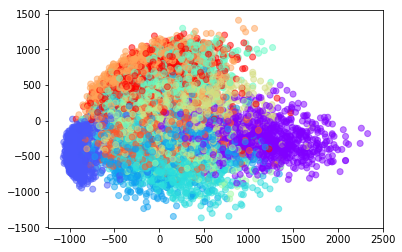

In [23]:
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=y[:10000].astype(int)/10,alpha=0.5,cmap='rainbow')
# plt.legend()
plt.show()

## T-sne를 이용한 시각화


In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [26]:
tsne_results = tsne.fit_transform(X[:10000])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.736s...
[t-SNE] Computed neighbors for 10000 samples in 139.685s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 448.615213
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.534912
[t-SNE] KL divergence after 300 iterations: 2.812588


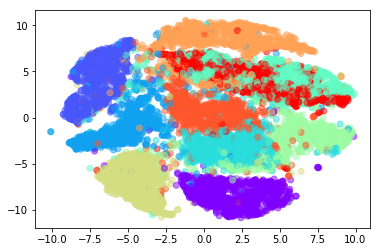

In [27]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=y[:10000].astype(int)/10,alpha=0.5,cmap='rainbow')
# plt.legend()
plt.show()